In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

import pathmagic
from tools.project import proj_dir

(2160, 2880, 3) (480, 640)


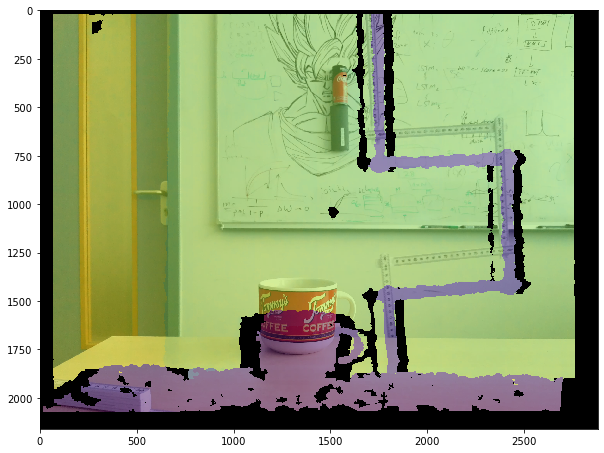

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from dataset_tools.rgbd_record import RgbdView
from dataset_tools.depth_registration import DepthRegistration

#root_dir = "/home/kevin/Pictures/frame_test/synced/clip1"
root_dir = "/home/kevin/Documents/master-thesis/datasets/andasus_dataset"

#clip_dir = root_dir + "/synced/clip18"
clip_dir = root_dir + "/synced/clip6"
calib_file = root_dir + "/calib/Calib_Results_stereo.mat"

rgbd_view = RgbdView()

save_dir = "/home/kevin/Documents/master-thesis/thesis/figures/pictures"

def save_image(img, name):
    img_format = "png"
    
    if img.dtype != np.uint8:
        img = np.round(img * 0xff).astype(np.uint8)
    
    if name is not None:
        Image.fromarray(img).save(os.path.join(save_dir, name + "." + img_format))

def show_color(rgb, save=None):
    save_image(rgb, save)
    plt.figure(figsize=(10,10))
    plt.imshow(rgb)

def upscale_depth_to_rgb(depth, rgb):
    if rgb.size != depth.size:
        depth = cv2.resize(depth, (rgb.shape[1], rgb.shape[0]), interpolation=cv2.INTER_NEAREST)
        
    return depth

def downscale_rgb_to_depth(rgb, depth):
    if rgb.size != depth.size:
        rgb = cv2.resize(rgb, (depth.shape[1], depth.shape[0]), interpolation=cv2.INTER_AREA)
    
    return rgb
    
def show_regist(rgb, depth, save=None, weight=0.5, ):
    print(rgb.shape, depth.shape)
          
    depth = upscale_depth_to_rgb(depth, rgb)
    
    regist = rgbd_view.get_registration_view_inst(rgb, depth[:,:,None], weight) / 0xffff
    save_image(regist, save)
    plt.figure(figsize=(10,10))
    plt.imshow(regist)
    
def show_depth(depth, save=None):
    depth = depth if len(depth.shape) == 3 else depth[:, :, None]
    depth = cv2.cvtColor(rgbd_view.process_depth(depth), cv2.COLOR_BGR2RGB) / 0xffff
    save_image(depth, save)
    plt.figure(figsize=(10,10))
    plt.imshow(depth)
    
def save_pointcloud(rgb, depth, name):
    rgb = downscale_rgb_to_depth(rgb, depth)
    depth_regist.save_pointcloud(os.path.join(save_dir, name + ".ply"), rgb, depth)
    

rgb_img = np.array(Image.open(clip_dir + "/color/color1.tif").convert('RGB'))
depth_img = np.array(Image.open(clip_dir + "/depth/depth1.tif"))

show_regist(rgb_img, depth_img)

depth_regist = DepthRegistration.from_matlab_calib(
    calib_file,
    undistort=False,
    rot_depth=1
)

546
2028
Res: (480, 640)
Focal Length RGB: [[529.5289348653702], [528.052956050818]]
Focal Length D: [[559.3429924578924], [558.683384611001]]
Principal Point RGB: [[234.8304944749873], [293.6888342903432]]
Principal Point D: [[238.34118729763006], [303.460295971871]]
Extrinsics Transform:
[[ 9.99832665e-01  1.39807746e-02 -1.17974723e-02  5.69525965e+01]
 [-1.39336558e-02  9.99894652e-01  4.06675898e-03  3.90833109e+00]
 [ 1.18530859e-02 -3.90169655e-03  9.99922138e-01 -1.98197873e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


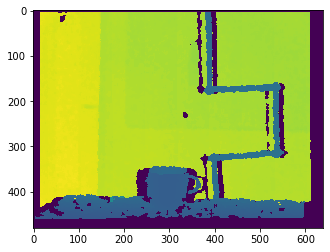

In [6]:
#depth_img[depth_img<500] = 0
#depth_img[depth_img>3000] = 0
#plt.hist(depth_img[np.nonzero(depth_img)].flatten(), bins="auto")
#plt.show()

#depth_img = depth_img.astype(float)

print(np.min(depth_img[np.nonzero(depth_img)]))
print(np.max(depth_img))

print("Res:", depth_img.shape)
print(depth_regist)

depth_img_reg = depth_regist(depth_img)
plt.imshow(depth_img)
#plt.imshow(depth_img_reg)

plt.show()

In [5]:
print(depth_img_reg.dtype)
print(depth_img_reg[421,421])
# plt.imshow(rgb_img)
print(type(depth_img_reg), depth_img_reg.shape)
print(rgb_img.dtype)


show_color(rgb_img, "andasus_sample_rgb")
show_depth(depth_img, "andasus_sample_depth_noregist")
show_depth(depth_img_reg, "andasus_sample_depth_regist")
show_regist(rgb_img, depth_img, "andasus_sample_regist_noregist")
show_regist(rgb_img, depth_img_reg, "andasus_sample_regist_regist")

NameError: name 'depth_img_reg' is not defined

In [16]:
save_pointcloud(rgb_img, depth_img_reg, "andasus_sample_cloud")

In [ ]:
print(depth_img_reg.shape)

plt.imshow(depth_img_reg)

In [ ]:
plt.imshow(depth_img)

In [ ]:
#print(depth_regist.call_vectorized(depth_img).shape)

In [ ]:
#depth_regist.test_regist(depth_img)